<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Market-comparison" data-toc-modified-id="Market-comparison-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Market comparison</a></span></li></ul></div>

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from evsim.data import load

__EPEX Intraday continous market__

- Continuous trading 7 days a week, 24 hours a day, all year around  
- Hourly contracts for the next day open at 15:00 pm (d-1) for DE, FR, CH & AT 
- Hourly contracts for the next day open at 2.00 pm (d-1) for NL & BE 
- 30-min contracts for the next day open at 15:30 (d-1) for CH, DE, FR 


- **15-min contracts for the next day open at 4.00 pm (d-1)**
- **LEAD TIME: 5 Minutes, Clearing every 15 Min**
- Till when do we trade when we assume average clearing prices?

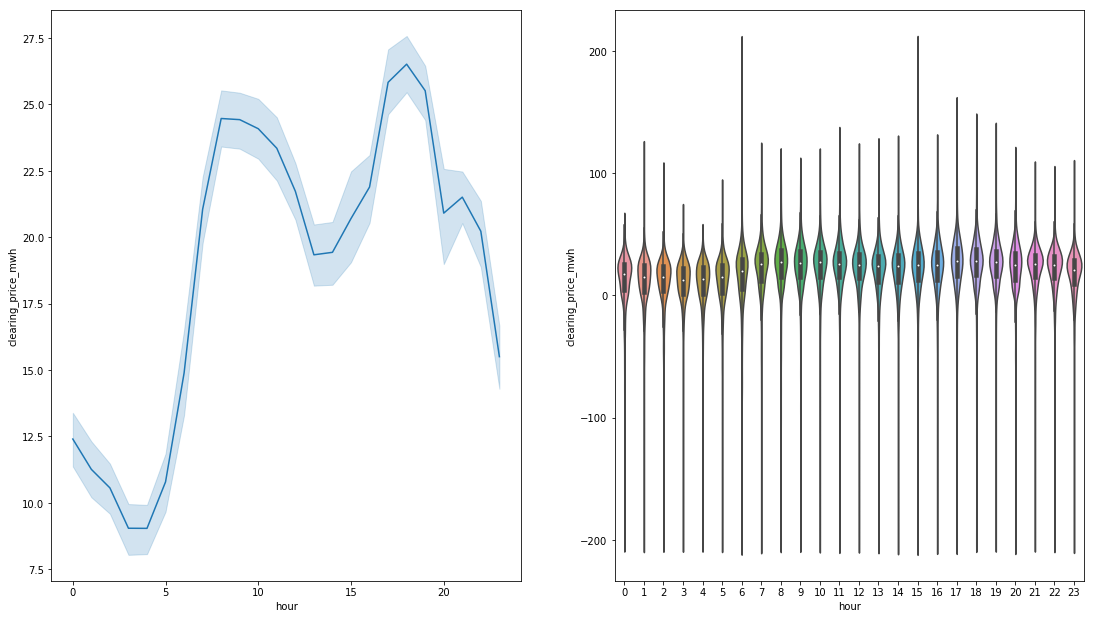

In [3]:
df = load.intraday_prices()
df["hour"] = df["product_time"].dt.hour

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 10.5)

sns.lineplot(x="hour", y="clearing_price_mwh", data=df, ax=ax1)

df["clearing_price_mwh"] = df["clearing_price_mwh"].clip(-200,200)
sns.violinplot(x="hour", y="clearing_price_mwh", data=df, ax=ax2);

## Market comparison

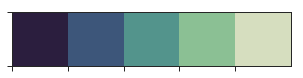

In [45]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_context("paper", font_scale=1.3)
sns.set_context("paper", font_scale=1.3, rc={"lines.linewidth": 1.5, "lines.markersize": 7})

sns.set_style("white")
sns.set_style("ticks")

palette = sns.cubehelix_palette(5, start=.5, rot=-.75, reverse=True)
sns.set_palette(palette)

sns.palplot(palette)

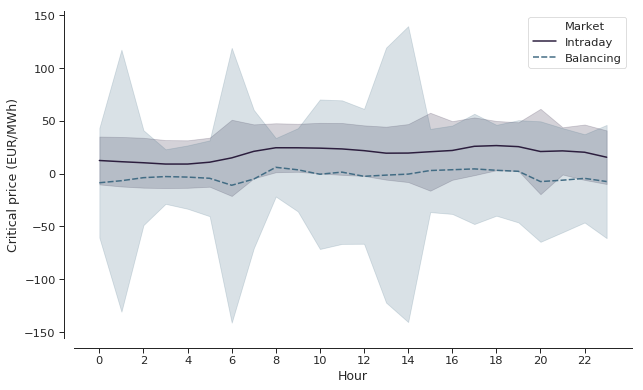

In [58]:
df_bal = load.balancing_prices()
df_in = load.intraday_prices()

x = "Hour"
var_name = "Market"
value_name = "Critical price (EUR/MWh)"

df_prices = df_in.merge(df_bal, on="product_time", how='outer')
df_prices.columns = [x, "Intraday", "Balancing"]
df_prices[x] = df_prices[x].dt.hour

df_prices = pd.melt(df_prices, id_vars=x, var_name=var_name, value_name=value_name) 

sns.set_palette(sns.cubehelix_palette(4, start=.5, rot=-.75, reverse=True))
sns.lineplot(x=x, y=value_name, hue=var_name, style=var_name, ci="sd", markers=False, data=df_prices)

sns.despine(offset=10)
plt.xticks(np.arange(0, 24, 2));